In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json

In [2]:
path= "example.txt"

records= [json.loads(line) for line in open(path)]
records[1]

{'a': 'GoogleMaps/RochesterNY',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Denver',
 'gr': 'UT',
 'g': 'mwszkS',
 'h': 'mwszkS',
 'l': 'bitly',
 'hh': 'j.mp',
 'r': 'http://www.AwareMap.com/',
 'u': 'http://www.monroecounty.gov/etc/911/rss.php',
 't': 1331923249,
 'hc': 1308262393,
 'cy': 'Provo',
 'll': [40.218102, -111.613297]}

In [3]:
frame= pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [5]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [6]:
tz_counts= frame['tz'].value_counts()
tz_counts[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [7]:
#frame.isnull().sum()

In [8]:
clean_tz= frame['tz'].fillna("Missing")

In [9]:
clean_tz[clean_tz==''] = 'Unknown'

In [10]:
tz_counts= clean_tz.value_counts()
tz_counts[:10]

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

In [11]:
subset= tz_counts[:10]
subset

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

<Axes: ylabel='tz'>

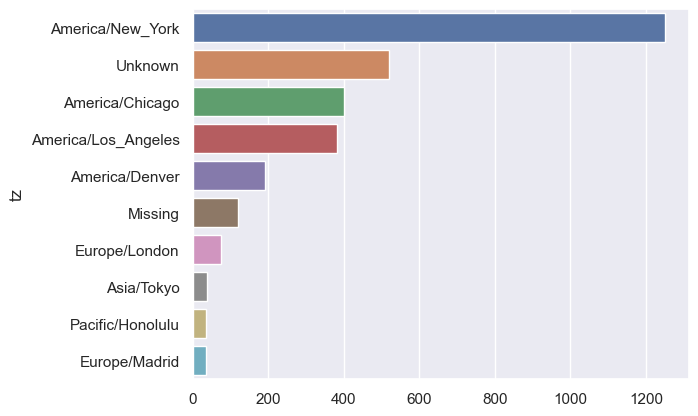

In [12]:
sns.barplot(y=subset.index, x=subset.values)

In [13]:
frame['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [14]:
frame['a'][5]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [15]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [16]:
frame['a'][:5]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [17]:
results= pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:2]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
dtype: object

In [18]:
results2= pd.Series([x.split()[-1] for x in frame.a.dropna()])
results2[:2]

0             Safari/535.11
1    GoogleMaps/RochesterNY
dtype: object

In [19]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [20]:
results2.value_counts()[:8]

Safari/535.11             620
Firefox/10.0.2            507
iPhone                    145
Trident/5.0)              142
3.5.30729)                127
GoogleMaps/RochesterNY    121
Safari/533.1              114
.NET4.0E)                 108
Name: count, dtype: int64

In [21]:
frame[:5]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [22]:
frame['a'].isnull().sum()

120

In [23]:
cframe= frame[frame.a.notnull()]
cframe.shape

(3440, 18)

In [25]:
cframe["os"] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not windows')

C:\Users\PC-020\AppData\Local\Temp\ipykernel_556\2932718501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe["os"] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not windows')


In [26]:
cframe.os[:5]

0        Windows
1    Not windows
2        Windows
3    Not windows
4        Windows
Name: os, dtype: object

In [39]:
by_tz_os= cframe.groupby(['tz', 'os'])

In [41]:
count_tz_os = by_tz_os.size().unstack().fillna(0)
count_tz_os[:10]

os,Not windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [45]:
indexer = count_tz_os.sum(1).argsort()
indexer

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [46]:
count_tz_os = count_tz_os.take(indexer[-10:])
count_tz_os

os,Not windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [47]:
tz_os_subset = count_tz_os.stack()
tz_os_subset

tz                   os         
America/Sao_Paulo    Not windows     13.0
                     Windows         20.0
Europe/Madrid        Not windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not windows      0.0
                     Windows         36.0
Asia/Tokyo           Not windows      2.0
                     Windows         35.0
Europe/London        Not windows     43.0
                     Windows         31.0
America/Denver       Not windows    132.0
                     Windows         59.0
America/Los_Angeles  Not windows    130.0
                     Windows        252.0
America/Chicago      Not windows    115.0
                     Windows        285.0
                     Not windows    245.0
                     Windows        276.0
America/New_York     Not windows    339.0
                     Windows        912.0
dtype: float64

In [48]:
tz_os_subset.name = 'total'
tz_os_subset= tz_os_subset.reset_index()

In [50]:
tz_os_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not windows,43.0
9,Europe/London,Windows,31.0


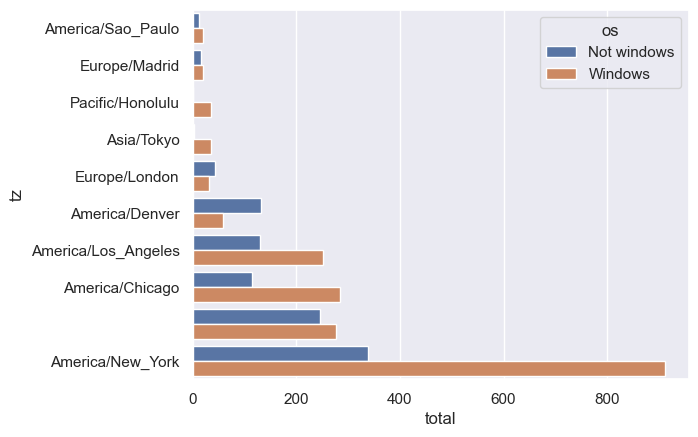

In [51]:
sns.barplot(x='total', y='tz', hue='os', data=tz_os_subset)
plt.show()

# MovieLens 1M data analysis

In [52]:
pd.options.display.max_rows= 10

In [77]:
bank_customers= pd.read_csv('selected_bank_variables.csv', index_col=0)
bank_customers.head()

,Customer_Age,Gender,Income_Category,Card_Category,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,45,0,30,1,39,12691.0,777,11914.0,1144,42,0.061
2,49,1,10,1,44,8256.0,864,7392.0,1291,33,0.105
3,51,0,40,1,36,3418.0,0,3418.0,1887,20,0.000
4,40,1,10,1,34,3313.0,2517,796.0,1171,20,0.760
5,40,0,30,1,21,4716.0,0,4716.0,816,28,0.000


In [89]:
mnames = ['movie_id', 'title', 'genres']
movies= pd.read_csv('movies.csv', sep='::',
                    header=None, names= mnames)
movies    

C:\Users\PC-020\AppData\Local\Temp\ipykernel_556\1015704506.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies= pd.read_csv('movies.csv', sep='::',


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3114: invalid continuation byte

In [86]:
mnames = ['movie_id', 'title', 'genres']
movies= pd.read_csv('ratings.csv', sep='::',
                    header=None, names= mnames)
movies                 

C:\Users\PC-020\AppData\Local\Temp\ipykernel_556\4287646247.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies= pd.read_csv('ratings.csv', sep='::',


,movie_id,title,genres
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291
...,...,...,...
6040,1091,1,956716541
6040,1094,5,956704887
6040,562,5,956704746
6040,1096,4,956715648


In [61]:
pwd

'C:\\Users\\PC-020\\Documents\\Python'

In [92]:
mnames = ['movie_id', 'title', 'genres']
movies= pd.read_csv('users.csv', sep='::')
movies 

C:\Users\PC-020\AppData\Local\Temp\ipykernel_556\1937260507.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies= pd.read_csv('users.csv', sep='::')


,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060
